### Salary dataset data visualization

#### The Project Uses Plotly for data visualization, but github dont render plotly plots, so below is jupyter nb view link

[https://nbviewer.org/github/Bytecode-Magnum/Salary_Data_ExploratoryDataAnalysis/blob/main/Sales_dataset_Data_Visualization.ipynb]


#### For data visualization we will be using plotly.express

In [147]:
import plotly.express as px
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df=pd.read_csv('Salary_Data.csv')
pd.set_option('display.float_format','{:.2f}'.format)
df.head()

,Age,Gender,Education Level,Job Title,Years of Experience,Salary
0,32.00,Male,Bachelor's,Software Engineer,5.00,NaN
1,28.00,Female,Master's,Data Analyst,3.00,65000.00
2,45.00,Male,NaN,Senior Manager,15.00,150000.00
3,36.00,Female,Bachelor's,NaN,7.00,60000.00
4,52.00,Male,Master's,Director,20.00,200000.00


In [148]:
def cleaning(df1):
        df1.rename(columns={'Education Level':'Education_Level',"Job Title":'Job_Title','Years of Experience':'Experience'},inplace=True)
        df1.Education_Level.value_counts()
        df1.loc[ (df.Education_Level=="Bachelor's"),'Education_Level']="Bachelor's Degree"
        df1.loc[ (df.Education_Level=="Master's"),'Education_Level']="Master's Degree"
        df1.loc[ (df.Education_Level=="phD"),'Education_Level']="PhD"
        df1.loc[df.isnull().any(axis=1)]
        df1.dropna(inplace=True)
        df1.loc[df.duplicated(keep=False)]
        df1.drop_duplicates(inplace=True)
        return df
df=cleaning(df)

#### Distribution plot of Salary

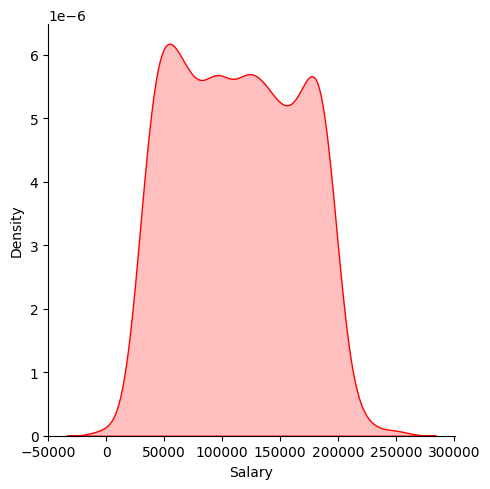

In [149]:
sns.displot(df['Salary'],kind='kde',fill=True,color='red')

#### Dsitribution plot of Age

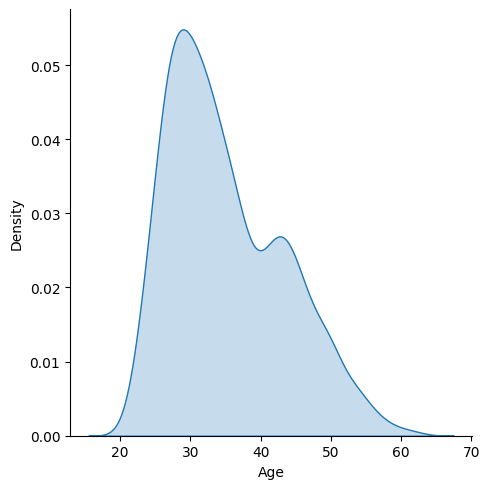

In [150]:
sns.displot(df['Age'],kind='kde',fill=True)

#### Comparison in the salary of master's degree holder and bachelor's degree holder`

<Axes: xlabel='Salary', ylabel='Density'>

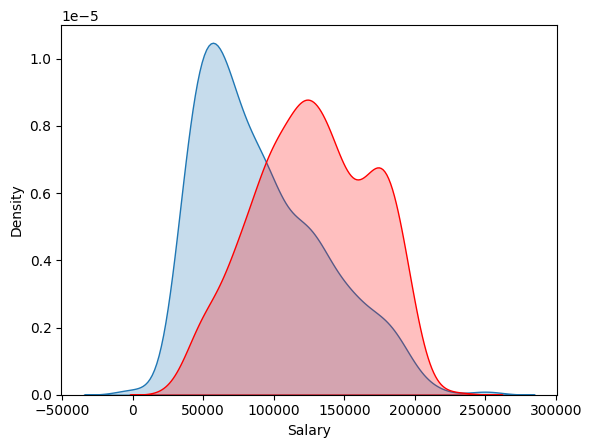

In [151]:
mas=df.loc[df.Education_Level=="Master's Degree"]
bac=df.loc[df.Education_Level=="Bachelor's Degree"]
i=pd.concat([mas,bac],axis=0)
# plt.show()
sns.kdeplot(data=bac['Salary'], label="Bachelor's Degree",fill=True)
sns.kdeplot(data=mas['Salary'], label="Master's Degree",fill=True,color='red')


#### Comparison of sarlary of front end and backend developer with experience of 3-4yr

<Axes: xlabel='Salary', ylabel='Density'>

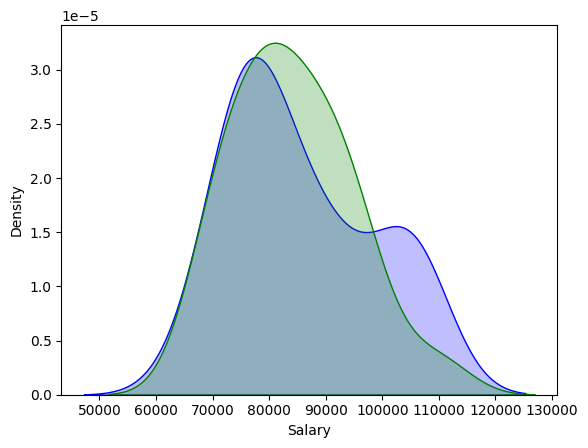

In [152]:
backend=df.query(' (Job_Title=="Back end Developer")  & Experience.between(3,5)')
frontend=df.query(' (Job_Title=="Front end Developer")  & Experience.between(3,5)')
sns.kdeplot(frontend['Salary'],fill=True,color='blue')
sns.kdeplot(backend['Salary'],fill=True,color='green')

#### Comparison of sarlary of front end and backend developer with experience of 3-4yr

<Axes: xlabel='Salary', ylabel='Density'>

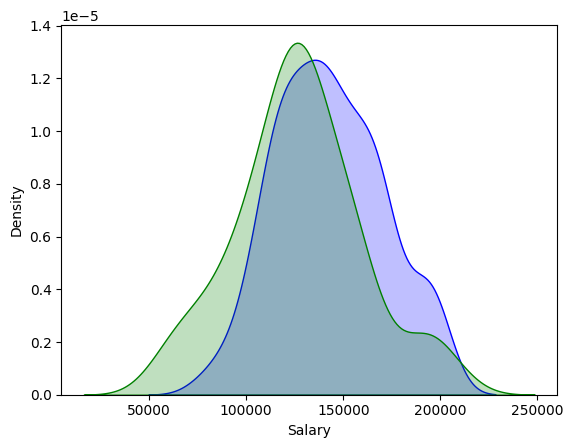

In [154]:
master=df.loc[ (df.Education_Level=="Master's Degree") & (df.Experience.between(10,15))]
bachelor=df.loc[ (df.Education_Level=="Bachelor's Degree") & (df.Experience.between(10,15))]
sns.kdeplot(master['Salary'],fill=True,color='blue')
sns.kdeplot(bachelor['Salary'],fill=True,color='green')

#### Scatter plot between Salary and Experience

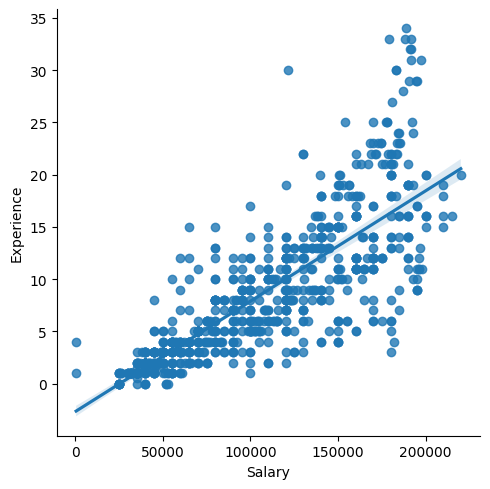

In [123]:
data=df.loc[df.Gender=='Female']
sns.lmplot(data,x='Salary',y='Experience')

#### Encoding the categorical data

In [124]:
Gender_code={'Female':0,'Male':1}
df.Gender=df.Gender.map(Gender_code)

#### Variation of experience of qualification

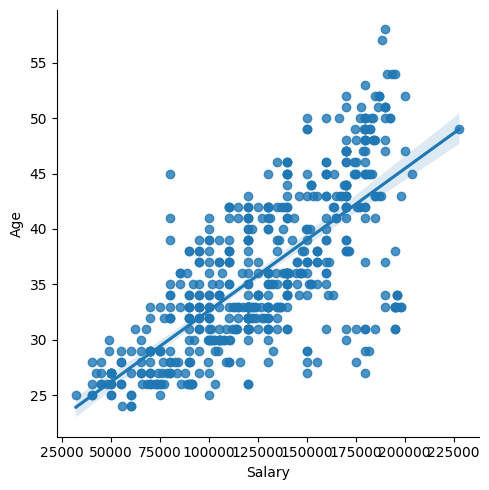

In [125]:
data=df.loc[df.Education_Level=="Master's Degree"]
sns.lmplot(data,x='Salary',y='Age')

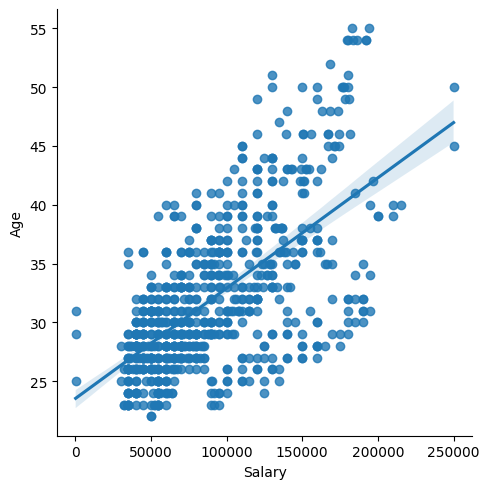

In [126]:
data=df.loc[df.Education_Level=="Bachelor's Degree"]
sns.lmplot(data,x='Salary',y='Age')

### Salary vs Education Level

<Axes: xlabel='Education_Level', ylabel='Salary'>

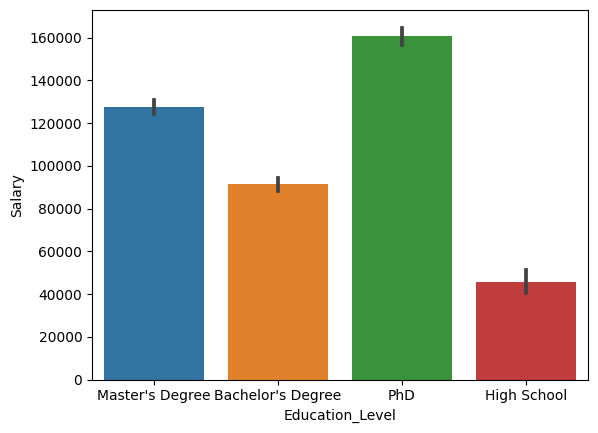

In [127]:
sns.barplot(df,x='Education_Level',y='Salary')
# so as the degree increases the salary increases

In [128]:
df.Education_Level.unique()

array(["Master's Degree", "Bachelor's Degree", 'PhD', 'High School'],
      dtype=object)

In [129]:
education_level_code={'High School':0,"Bachelor's Degree":1,"Master's Degree":3,'PhD':4}
df.Education_Level=df.Education_Level.map(education_level_code)

### Salary box plot

{'whiskers': [<matplotlib.lines.Line2D at 0x1da8478e860>,
 'caps': [<matplotlib.lines.Line2D at 0x1da8478eda0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1da8478e590>],
 'medians': [<matplotlib.lines.Line2D at 0x1da8478f2e0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1da8478f580>],
 'means': []}

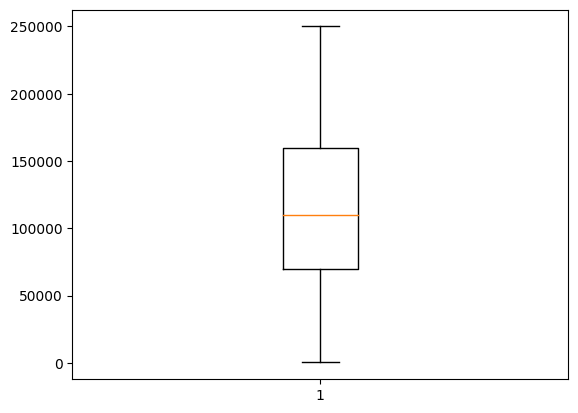

In [130]:
plt.boxplot(df['Salary'])

### HeatMap for various cols

<Axes: >

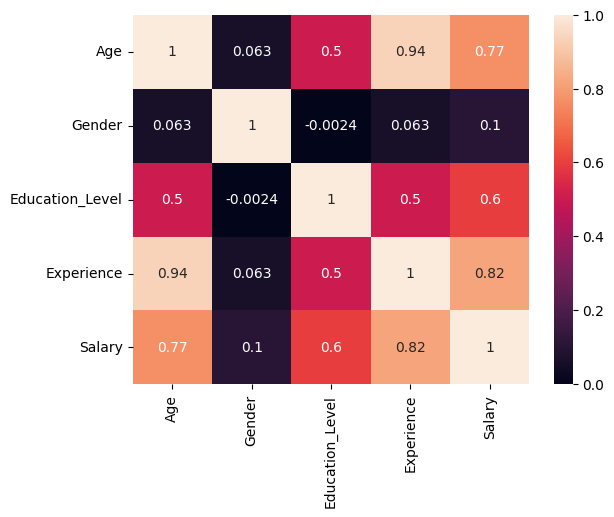

In [131]:
numerical_cols=df.select_dtypes(include=['int','float'])
cor=numerical_cols.corr()
sns.heatmap(cor,annot=True)

#### so the above heatmap shows that salary is highly correlated with experience and education_level

In [132]:
new_df=df.copy()